<a href="https://colab.research.google.com/github/sitbayevalibek/data-science-praktikum-amaliyotlar/blob/main/_ML_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

# Kutubxonalarni chaqirish

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df['size'] = df['size'].replace({'Площадьземли:1сот': np.nan}).astype(float)

In [ ]:
df['price'] = df['price'].replace({'Договорная': np.nan}).astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7565.000000,7564.000000,7565.000000,7565.000000,7.466000e+03
mean,2.625644,113.268990,3.699273,6.038202,7.133421e+04
std,1.085201,1491.312092,2.237275,2.613271,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [ ]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [ ]:
def fill_size_by_num_rooms(df):
    nan_rows = df[pd.isna(df['size'])].index
    orta_prices = df.groupby('rooms')['size'].mean()
    for row in nan_rows:
        num_rooms = df.at[row, 'rooms']
        df.at[row, 'size'] = orta_prices.get(num_rooms)

In [ ]:
fill_size_by_num_rooms(df)

In [ ]:
def fill_price_by_num_rooms(df):
    nan_rows = df[pd.isna(df['price'])].index
    orta_prices = df.groupby('rooms')['price'].mean()
    for row in nan_rows:
        num_rooms = df.at[row, 'rooms']
        df.at[row, 'price'] = orta_prices.get(num_rooms)

In [ ]:
fill_price_by_num_rooms(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7565 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [ ]:
# filtered_rows = df[df['size'] > 250]
# filtered_rows

In [ ]:

def fill_size_mean_rooms(df):
    filtered_rows = df[df['size'] > 500]
    mean_size = df.groupby('rooms')['size'].mean()
    for index, row in filtered_rows.iterrows():
        num_rooms = row['rooms']
        df.at[index, 'size'] = mean_size.get(num_rooms)


In [ ]:
fill_size_mean_rooms(df)

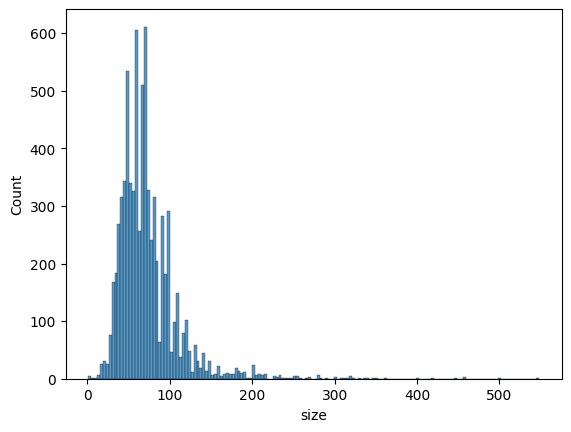

In [ ]:
sns.histplot(data=df, x='size')
plt.show()

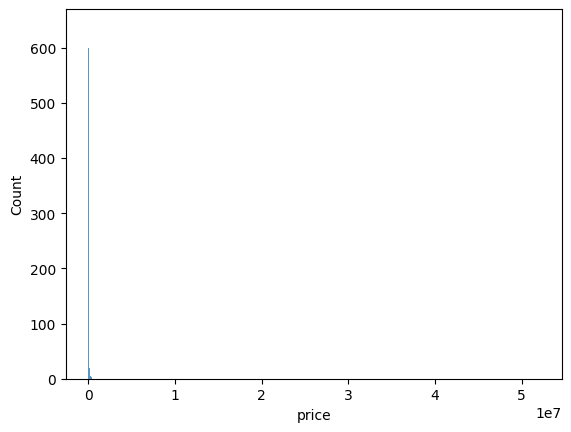

In [ ]:
sns.histplot(data=df, x='price')
plt.show()

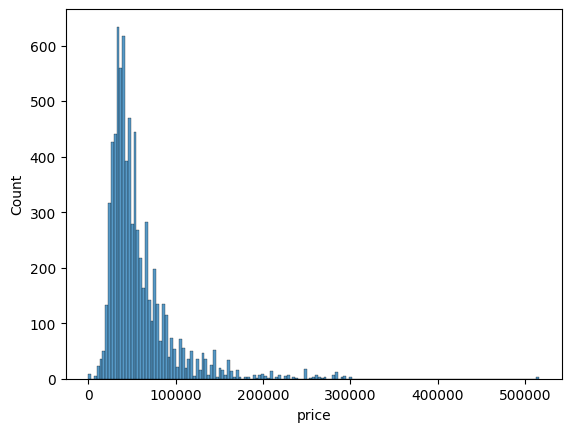

In [ ]:
sns.histplot(data=df, x='price')
plt.show()

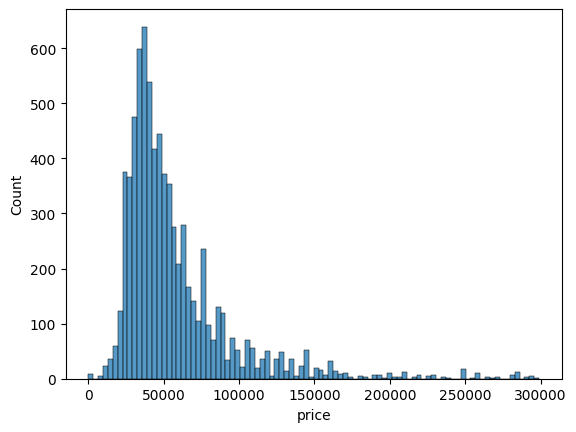

In [ ]:
df=df[df['price']<300000]
sns.histplot(data=df, x='price')
plt.show()

In [ ]:
def price_mean_rooms(df):
    filtered_rows = df[df['price'] > 300000]
    mean_price = df.groupby('rooms')['price'].mean()
    for index, row in filtered_rows.iterrows():
        num_rooms = row['rooms']
        df.at[index, 'price'] = mean_price.get(num_rooms)


In [ ]:
price_mean_rooms(df)

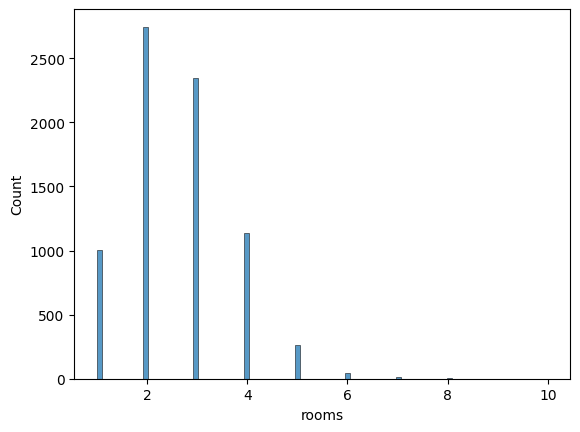

In [ ]:
sns.histplot(data=df, x='rooms')
plt.show()

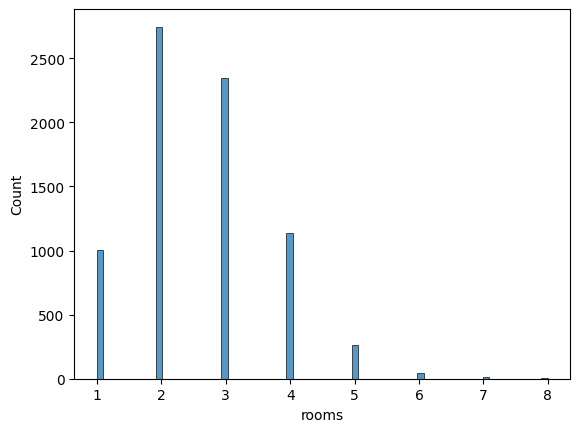

In [ ]:
df=df[df['rooms']<9]
sns.histplot(data=df, x='rooms')
plt.show()

In [ ]:
filtered_rows = df[df['rooms'] > 6]
print(filtered_rows)


                                               location           district  \
262             город Ташкент, Мирабадский район, Нукус        Мирабадский   
852     город Ташкент, Мирзо-Улугбекский район, Паркент  Мирзо-Улугбекский   
1675            город Ташкент, Мирабадский район, Нукус        Мирабадский   
2147         город Ташкент, Учтепинский район, Куксарой        Учтепинский   
2568  город Ташкент, Яккасарайский район, Шота Руста...      Яккасарайский   
3613    город Ташкент, Мирзо-Улугбекский район, Паркент  Мирзо-Улугбекский   
3712       город Ташкент, Сергелийский район, Sergeli 5       Сергелийский   
4025          город Ташкент, Яккасарайский район, Ракат      Яккасарайский   
4125      город Ташкент, Шайхантахурский район, Караташ    Шайхантахурский   
4222       город Ташкент, Шайхантахурский район, Бирлик    Шайхантахурский   
5111      город Ташкент, Шайхантахурский район, Хувайдо    Шайхантахурский   
5719      город Ташкент, Шайхантахурский район, Караташ    Шайха

In [ ]:
df.loc[5719]

location      город Ташкент, Шайхантахурский район, Караташ
district                                    Шайхантахурский
rooms                                                     7
size                                                  230.0
level                                                     2
max_levels                                                5
price                                                1000.0
Name: 5719, dtype: object

In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000
mean,2.619823,73.262564,3.698955,6.037978,58034.487289
std,1.067640,37.007739,2.237255,2.614405,38238.012682
min,1.000000,1.000000,1.000000,1.000000,20000.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,66.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,67000.000000
max,8.000000,548.083333,19.000000,25.000000,299000.000000


In [ ]:
def price_mean_kam_rooms(df):
    filtered_rows = df[df['price'] < 20000]
    mean_price = df.groupby('rooms')['price'].mean()
    for index, row in filtered_rows.iterrows():
        num_rooms = row['rooms']
        df.at[index, 'price'] = mean_price.get(num_rooms)


In [ ]:
price_mean_kam_rooms(df)

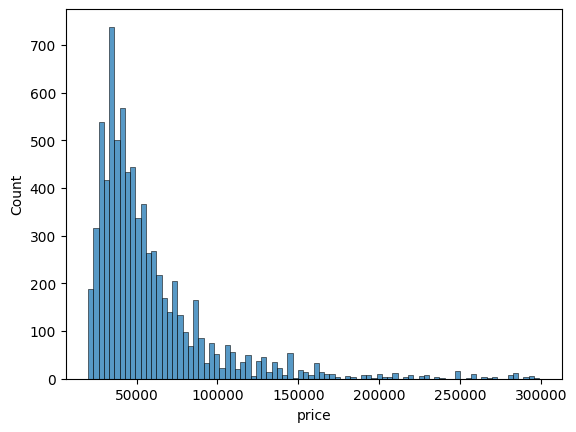

In [ ]:
sns.histplot(data=df, x='price')
plt.show()

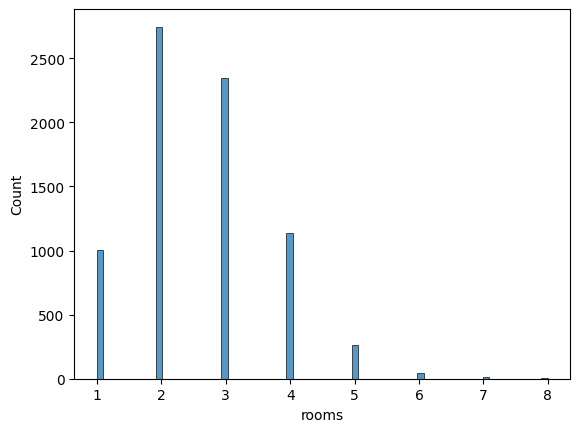

In [ ]:
sns.histplot(data=df, x='rooms')
plt.show()

In [ ]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0


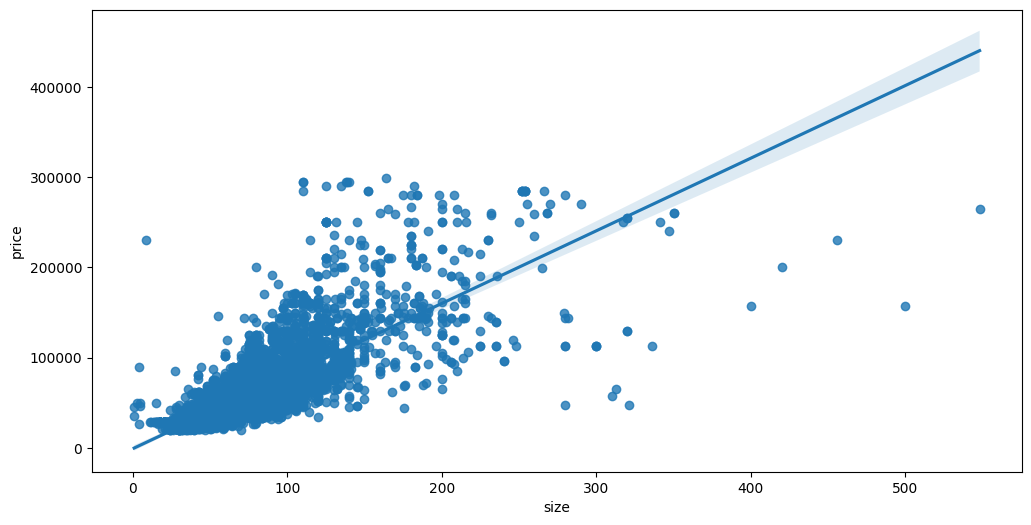

In [ ]:
plt.figure(figsize=(12,6))
# sns.scatterplot(data=df, x='size', y='price', hue='rooms')
sns.regplot(data=df, x='size', y='price')
plt.show()

In [ ]:
df.corrwith(df['price']).sort_values(ascending=False)

<ipython-input-72-165692e52bde>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['price']).sort_values(ascending=False)


price         1.000000
size          0.778626
rooms         0.595299
max_levels    0.240952
level         0.064173
dtype: float64

# Train va Test set larga ajratish #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [ ]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0


In [ ]:
housing = train_set.drop("price", axis=1)
housing_labels = train_set["price"].copy()

In [ ]:
housing

,location,district,rooms,size,level,max_levels
746,"город Ташкент, Яккасарайский район, Ресторан Д...",Яккасарайский,1,45.0,3,4
4961,"город Ташкент, Сергелийский район, Сергели-V",Сергелийский,2,70.0,3,7
5713,"город Ташкент, Учтепинский район, Ул. Ширин",Учтепинский,2,49.0,4,4
3972,"город Ташкент, Шайхантахурский район, Самаркан...",Шайхантахурский,2,70.0,5,7
2185,"город Ташкент, Сергелийский район, Спутник 4",Сергелийский,2,50.0,1,4
...,...,...,...,...,...,...
5197,"город Ташкент, Шайхантахурский район, Хадра",Шайхантахурский,6,420.0,7,7
5232,"город Ташкент, Чиланзарский район, Чиланзар-6",Чиланзарский,2,60.0,2,5
5396,"город Ташкент, Учтепинский район, Чиланзар 23-...",Учтепинский,1,42.0,1,4
860,"город Ташкент, Шайхантахурский район, Лабзак",Шайхантахурский,2,60.0,3,4


In [ ]:
df = df.drop('location', axis=1)

In [ ]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.000000
1,Яккасарайский,2,52.0,4,5,56000.000000
2,Чиланзарский,2,42.0,4,4,37000.000000
3,Чиланзарский,3,65.0,1,4,49500.000000
4,Чиланзарский,3,70.0,3,5,55000.000000
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.000000
7561,Яшнободский,2,49.0,1,4,32000.000000
7562,Шайхантахурский,2,64.0,3,9,40000.000000
7563,Мирзо-Улугбекский,1,18.0,1,4,28210.637152


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) 

In [ ]:
train_set

,district,rooms,size,level,max_levels,price
746,Яккасарайский,1,45.0,3,4,40000.0
4961,Сергелийский,2,70.0,3,7,35200.0
5713,Учтепинский,2,49.0,4,4,30000.0
3972,Шайхантахурский,2,70.0,5,7,56000.0
2185,Сергелийский,2,50.0,1,4,37000.0
...,...,...,...,...,...,...
5197,Шайхантахурский,6,420.0,7,7,200000.0
5232,Чиланзарский,2,60.0,2,5,39000.0
5396,Учтепинский,1,42.0,1,4,25990.0
860,Шайхантахурский,2,60.0,3,4,53000.0


In [ ]:
housing = train_set.drop("price", axis=1)
housing_labels = train_set["price"].copy()

In [ ]:
housing

,district,rooms,size,level,max_levels
746,Яккасарайский,1,45.0,3,4
4961,Сергелийский,2,70.0,3,7
5713,Учтепинский,2,49.0,4,4
3972,Шайхантахурский,2,70.0,5,7
2185,Сергелийский,2,50.0,1,4
...,...,...,...,...,...
5197,Шайхантахурский,6,420.0,7,7
5232,Чиланзарский,2,60.0,2,5
5396,Учтепинский,1,42.0,1,4
860,Шайхантахурский,2,60.0,3,4


In [ ]:
housing_labels

746      40000.0
4961     35200.0
5713     30000.0
3972     56000.0
2185     37000.0
          ...   
5197    200000.0
5232     39000.0
5396     25990.0
860      53000.0
7278     63000.0
Name: price, Length: 6045, dtype: float64

In [ ]:
# housing_cat = housing[['district']]

In [ ]:
housing_num = housing.drop("district", axis=1)


## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [ ]:
num_pipeline.fit_transform(housing_num)

array([[-1.50770975, -0.75075481, -0.30726069, -0.78234765],
       [-0.57560651, -0.09095212, -0.30726069,  0.362205  ],
       [-0.57560651, -0.64518638,  0.14062715, -0.78234765],
       ...,
       [-1.50770975, -0.82993114, -1.20303635, -0.78234765],
       [-0.57560651, -0.3548732 , -0.30726069, -0.78234765],
       [ 1.28859996,  0.59524268,  2.38006631,  2.26979274]])

In [ ]:
from sklearn.compose import ColumnTransformer
num_attrs = list(housing_num)
cat_attrs = ['district']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs)
])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared[0:5,:]

array([[-1.50770975, -0.75075481, -0.30726069, -0.78234765,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.57560651, -0.09095212, -0.30726069,  0.362205  ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57560651, -0.64518638,  0.14062715, -0.78234765,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57560651, -0.09095212,  0.58851498,  0.362205  ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57560651, -0.61879427, -1

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [ ]:
LR_model.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
test_data = housing.sample(5)
test_data

,district,rooms,size,level,max_levels
677,Юнусабадский,2,60.0,3,5
6032,Мирзо-Улугбекский,2,42.0,2,5
2891,Юнусабадский,3,76.0,4,4
502,Мирзо-Улугбекский,2,60.0,6,9
7057,Юнусабадский,3,110.0,2,8


In [ ]:
test_label = housing_labels.loc[test_data.index]
test_label

677      44000.0
6032     33500.0
2891     41000.0
502      34000.0
7057    165000.0
Name: price, dtype: float64

In [ ]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[-0.57560651, -0.3548732 , -0.30726069, -0.4008301 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57560651, -0.82993114, -0.75514852, -0.4008301 ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.35649672,  0.06740053,  0.14062715, -0.78234765,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57560651, -0.3548732 ,  1.03640281,  1.1252401 ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.35649672,  0.96473219, -0

In [ ]:
predicted_test_data = LR_model.predict(test_data_prepared)

In [ ]:
pd.DataFrame({'Prognoz':predicted_test_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
677,48265.828771,44000.0
6032,36425.569622,33500.0
2891,58184.760380,41000.0
502,47390.037190,34000.0
7057,92514.111951,165000.0


## Modelni baholash

In [ ]:
test_set

,district,rooms,size,level,max_levels,price
3152,Мирабадский,2,65.0,4,4,60000.0
1663,Мирабадский,3,103.0,4,8,103000.0
3082,Мирзо-Улугбекский,4,120.0,2,6,120000.0
3016,Чиланзарский,2,68.0,4,6,68000.0
3336,Мирабадский,4,100.0,8,9,95000.0
...,...,...,...,...,...,...
6619,Яшнободский,2,70.0,5,5,47000.0
5828,Мирабадский,5,120.0,7,9,108000.0
7087,Мирзо-Улугбекский,2,48.0,4,4,27394.0
3900,Яккасарайский,2,56.0,7,12,36500.0


In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels
3152,Мирабадский,2,65.0,4,4
1663,Мирабадский,3,103.0,4,8
3082,Мирзо-Улугбекский,4,120.0,2,6
3016,Чиланзарский,2,68.0,4,6
3336,Мирабадский,4,100.0,8,9
...,...,...,...,...,...
6619,Яшнободский,2,70.0,5,5
5828,Мирабадский,5,120.0,7,9
7087,Мирзо-Улугбекский,2,48.0,4,4
3900,Яккасарайский,2,56.0,7,12


In [ ]:
y_test = test_set['price'].copy()
y_test

3152     60000.0
1663    103000.0
3082    120000.0
3016     68000.0
3336     95000.0
          ...   
6619     47000.0
5828    108000.0
7087     27394.0
3900     36500.0
6962     47300.0
Name: price, Length: 1512, dtype: float64

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

20092.37037148715


## DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
y_predicted = Tree_model.predict(X_test_prepared)

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

21678.418195201175


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

16277.896312731287


## Cross Validation

In [ ]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.transform(X)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score

## LogisticRegression

In [ ]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(LR_rmse_scores)

Scores: [18379.20726147 18498.3739726  29186.8125526  25099.1282719
 25803.61305407 28862.55748916 22612.14376881 18404.83573226
 20886.72335157 17519.07802843]
Mean: 22525.24734828691
Std.dev: 4243.202659645872


Decition Tree

In [ ]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [19843.8186578  21859.13640555 28252.8864765  25205.27669801
 27649.19548294 24313.34901236 22196.64111935 20854.93019958
 22919.31300363 19620.84286453]
Mean: 23271.53899202316
Std.dev: 2880.8610754098195


Random Forest

In [ ]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [14570.64844076 16623.95924746 22233.08175411 22378.12463677
 20725.57646994 21944.56042672 18332.40347581 17133.61670474
 17599.54164844 15334.26000788]
Mean: 18687.57728126298
Std.dev: 2777.215229325337


# pikle yordamida modelni saqlash

In [ ]:
import pickle

filename = 'RF_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

## Modelni qayta o'qiymiz:

In [ ]:
with open(filename, 'rb') as file:
    model = pickle.load(file) #RF_model nomi model deb o'zgartirildi

### Modelni sinab ko'ramiz

In [ ]:
scores = cross_val_score(model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [15595.74742872 22393.80760405 21575.90261182 18403.64576601
 17070.49678786]
Mean: 19007.92003969239
Std.dev: 2600.7863145949823


## joblib yordamida saqlash

In [ ]:
import joblib

filename = 'LR_model.jbl' # faylga istalgan nom beramiz
joblib.dump(LR_model, filename)

['LR_model.jbl']

Modelni o'qiymiz

In [ ]:
model_lr = joblib.load(filename) #LR_model nomi model_lr ga o'zgartirildi

In [ ]:
scores = cross_val_score(model_lr, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [18436.10385464 27161.69875681 27411.198146   20652.61998484
 19279.94882782]
Mean: 22588.313914023613
Std.dev: 3901.515093998488
